In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

### Part 1

In [2]:
def var_df():
    df = pd.read_csv("Data_SP500.csv", index_col=0).rename(columns={'SP500': 'close'})
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y')
    df['returns'] = np.log(df.close) - np.log(df.close.shift(1))
    df['mean'] = df['returns'].rolling(21).mean()
    df['stdev'] = df['returns'].rolling(21).std()
    df['VaR_99_10D'] = norm.ppf(1-0.99) * df['stdev'] * np.sqrt(10) * 100
    df['Forward_Return'] = (np.log(df.close.shift(-11)) - np.log(df.close.shift(-1))) * 100
    df = df.dropna()
    df['Breaches'] = np.where(df['Forward_Return'] < df['VaR_99_10D'], 1, 0)
    print('Percentage of Breaches: ', df['Breaches'].mean()*100)
    count = df['Breaches'].groupby((df['Breaches'] != df['Breaches'].shift()).cumsum()).cumcount()
    df['Breachers_Conc'] = df['Breaches'] * count
    return df

In [3]:
def plot_backtest_full(df, name, y_1, y_2, y_3, y_4):
    fig = plt.figure(figsize = (10,5))
    gs = fig.add_gridspec(nrows=3, hspace=0.1)
    ax = fig.add_subplot(gs[:-1])
    ax2 = fig.add_subplot(gs[-1], sharex=ax)
    ax.get_xaxis().set_visible(False)
    fig.suptitle(f'{name}')
    sns.lineplot(data=df.reset_index(), x="Date", y=y_1, ax=ax, color='blue')
    sns.lineplot(data=df.reset_index(), x="Date", y=y_2, color='orange', ax=ax, linewidth = 1)
    sns.scatterplot(x="Date", y=y_2, data=df[df[y_3] == 1].reset_index(), ax=ax, color='red')
    sns.lineplot(data=df.reset_index(), x="Date", y=y_4,ax=ax2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Return %")
    ax2.set_ylabel("# Consecutive \n Breaches")
    ax.legend(labels=['Return', 'Value-at-Risk', 'Breach'])
    plt.savefig(f"Question_3_{name}.png".replace(" ", "_"), format='png', transparent=False)

def plot_backtest(df, name, y_1, y_2, y_3, y_4):
    dates = ['2013-01-01', '2014-01-01', '2015-01-01',  '2016-01-01',  '2017-01-01',  '2018-01-01']
    for i in range(len(dates) -1):
        fig = plt.figure(figsize = (10,5))
        gs = fig.add_gridspec(nrows=3, hspace=0.1)
        ax = fig.add_subplot(gs[:-1])
        ax2 = fig.add_subplot(gs[-1], sharex=ax)
        fig.suptitle(f'{name} - {dates[i]} to {dates[i+1]}')
        ax.get_xaxis().set_visible(False)
        sns.lineplot(data=df.reset_index(), x="Date", y=y_1, ax=ax, color='blue')
        sns.lineplot(data=df.reset_index(), x="Date", y=y_2, color='orange', ax=ax, linewidth = 1)
        sns.scatterplot(x="Date", y=y_2, data=df[df[y_3] == 1].reset_index(), ax=ax, color='red')
        sns.lineplot(data=df.reset_index(), x="Date", y=y_4,ax=ax2)
        ax.set_xlim(dates[i], dates[i+1])
        ax.set_xlabel("Date")
        ax.set_ylabel("Return %")
        ax2.set_ylabel("# Consecutive \n Breaches")
        ax.legend(labels=['Return', 'Value-at-Risk', 'Breach'])
        plt.savefig(f"Question_3_{name}_{i}.png".replace(" ", "_"), format='png', transparent=False)


In [4]:
var_df()

Percentage of Breaches:  2.052545155993432


,close,returns,mean,stdev,VaR_99_10D,Forward_Return,Breaches,Breachers_Conc
Date,,,,,,,,
2013-02-21,1502.420044,-0.006323,0.000314,0.005969,-4.390824,2.320458,0,0
2013-02-22,1515.599976,0.008734,0.000658,0.006243,-4.592630,4.492768,0,0
2013-02-25,1487.849976,-0.018479,-0.000223,0.007513,-5.527232,3.643065,0,0
2013-02-26,1496.939941,0.006091,-0.000191,0.007540,-5.546486,2.509814,0,0
2013-02-27,1515.989990,0.012646,0.000499,0.008028,-5.905682,3.154995,0,0
...,...,...,...,...,...,...,...,...
2017-12-13,2662.850098,-0.000473,0.001416,0.004184,-3.077977,0.811181,0,0
2017-12-14,2652.010010,-0.004079,0.001332,0.004279,-3.148156,0.744658,0,0
2017-12-15,2675.810059,0.008934,0.002021,0.004283,-3.150677,0.847653,0,0


Percentage of Breaches:  2.052545155993432


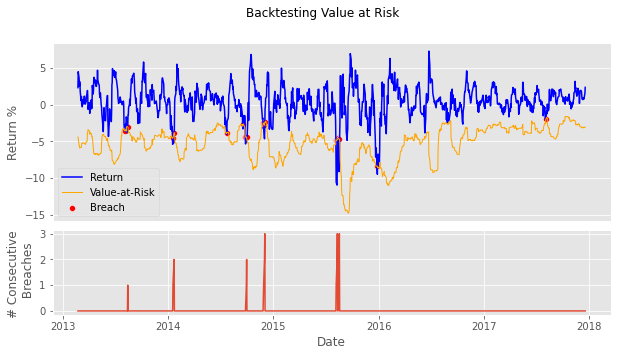

In [5]:
plot_backtest_full(var_df(), "Backtesting Value at Risk", "Forward_Return", "VaR_99_10D", "Breaches", "Breachers_Conc")

Percentage of Breaches:  2.052545155993432


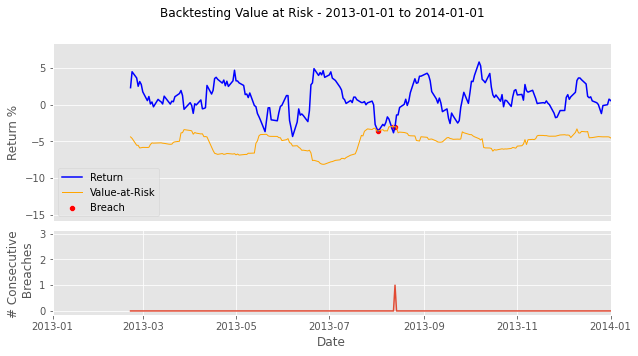

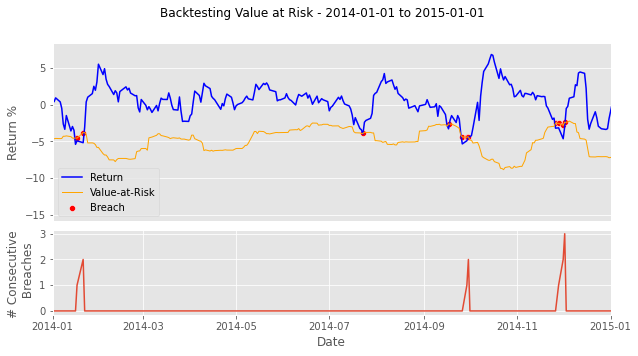

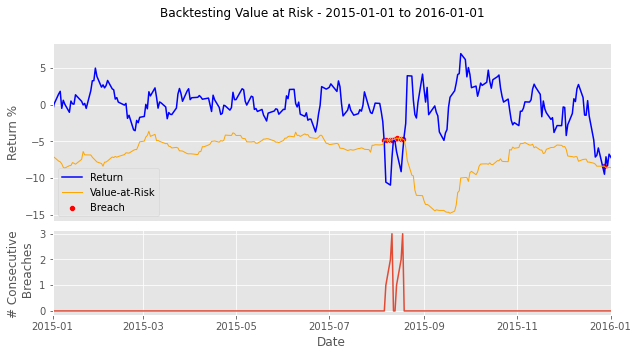

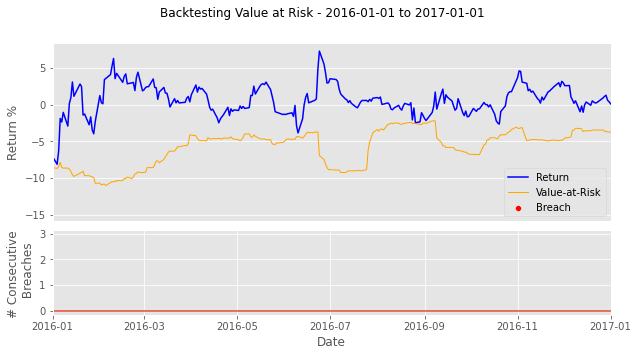

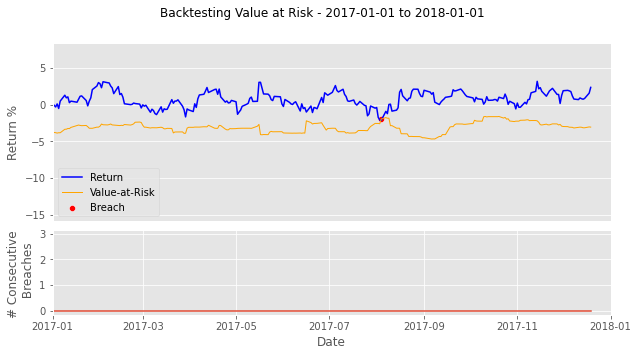

In [6]:
plot_backtest(var_df(), "Backtesting Value at Risk", "Forward_Return", "VaR_99_10D", "Breaches", "Breachers_Conc")

### Part 2

In [7]:
def ewma(start_var: float, sqrd_rets: list, lam: float):
    
    var = [start_var]
    for i in range(1,len(sqrd_rets)):
        var.append(lam * var[i-1] + (1-lam) * sqrd_rets[i-1])
            
    return np.array(var)

def var_ewma_df():
    df = pd.read_csv("Data_SP500.csv", index_col=0).rename(columns={'SP500': 'close'})
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y')
    df['returns'] = np.log(df.close) - np.log(df.close.shift(1))
    df['mean'] = df['returns'].rolling(21).mean()
    df['stdev'] = df['returns'].rolling(21).std()
    df = df.dropna()
    df['Squared_returns'] = df['returns']**2
    df['Var_Estimate'] = ewma(df.iloc[0]['stdev']**2, df['Squared_returns'].values, 0.72)
    df['Std_Estimate'] = np.sqrt(df['Var_Estimate'])
    df['VaR_99_10D_EWMA'] = norm.ppf(1-0.99) * df['Std_Estimate'] * np.sqrt(10) * 100
    df['Forward_Return'] = (np.log(df.close.shift(-11)) - np.log(df.close.shift(-1))) * 100
    df['Breaches_EWMA'] = np.where(df['Forward_Return'] < df['VaR_99_10D_EWMA'], 1, 0)
    df = df.dropna()
    print('Percentage of Breaches: ', df['Breaches_EWMA'].mean()*100)
    groupby_func = df['Breaches_EWMA'] != df['Breaches_EWMA'].shift()
    count = (df['Breaches_EWMA'].groupby(groupby_func.cumsum()).cumcount())
    df['Breaches_EWMA_Conc'] = df['Breaches_EWMA'] * count
    return df

In [8]:
var_ewma_df()

Percentage of Breaches:  2.955665024630542


,close,returns,mean,stdev,Squared_returns,Var_Estimate,Std_Estimate,VaR_99_10D_EWMA,Forward_Return,Breaches_EWMA,Breaches_EWMA_Conc
Date,,,,,,,,,,,
2013-02-21,1502.420044,-0.006323,0.000314,0.005969,3.998040e-05,0.000036,0.005969,-4.390824,2.320458,0,0
2013-02-22,1515.599976,0.008734,0.000658,0.006243,7.628649e-05,0.000037,0.006070,-4.465364,4.492768,0,0
2013-02-25,1487.849976,-0.018479,-0.000223,0.007513,3.414836e-04,0.000048,0.006920,-5.090810,3.643065,0,0
2013-02-26,1496.939941,0.006091,-0.000191,0.007540,3.709877e-05,0.000130,0.011406,-8.390818,2.509814,0,0
2013-02-27,1515.989990,0.012646,0.000499,0.008028,1.599137e-04,0.000104,0.010201,-7.504258,3.154995,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-13,2662.850098,-0.000473,0.001416,0.004184,2.237940e-07,0.000012,0.003397,-2.499020,0.811181,0,0
2017-12-14,2652.010010,-0.004079,0.001332,0.004279,1.663961e-05,0.000008,0.002893,-2.128470,0.744658,0,0
2017-12-15,2675.810059,0.008934,0.002021,0.004283,7.982196e-05,0.000011,0.003269,-2.404855,0.847653,0,0


Percentage of Breaches:  2.955665024630542


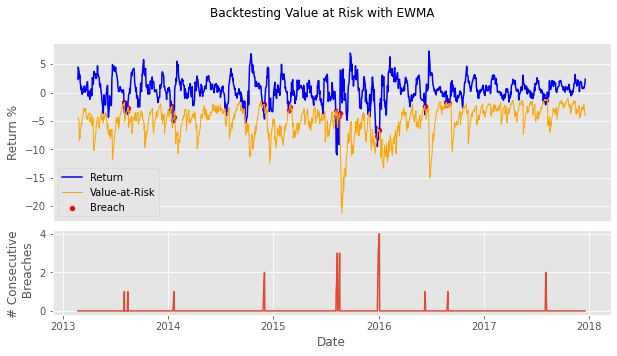

In [9]:
plot_backtest_full(var_ewma_df(), "Backtesting Value at Risk with EWMA", "Forward_Return", "VaR_99_10D_EWMA", "Breaches_EWMA", "Breaches_EWMA_Conc")

Percentage of Breaches:  2.955665024630542


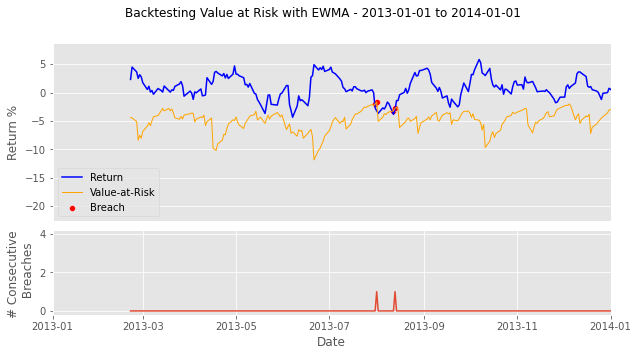

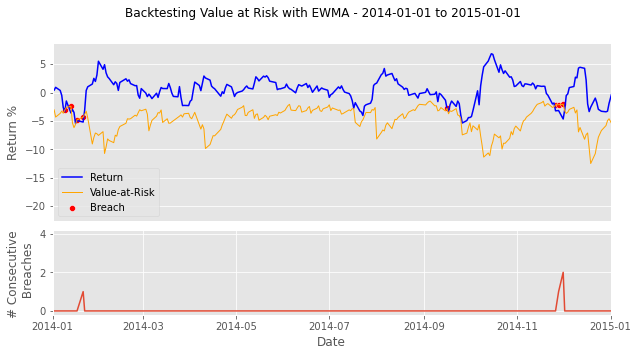

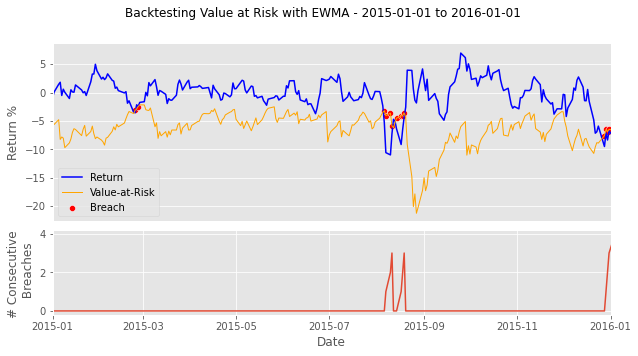

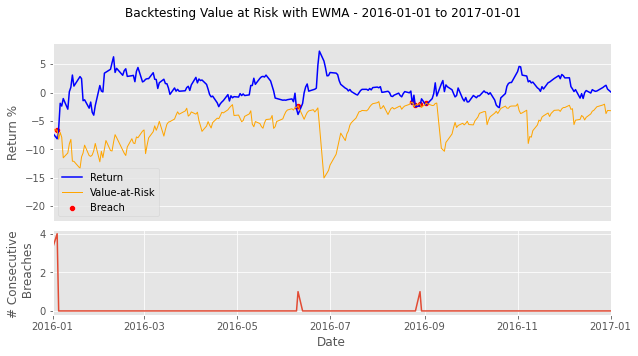

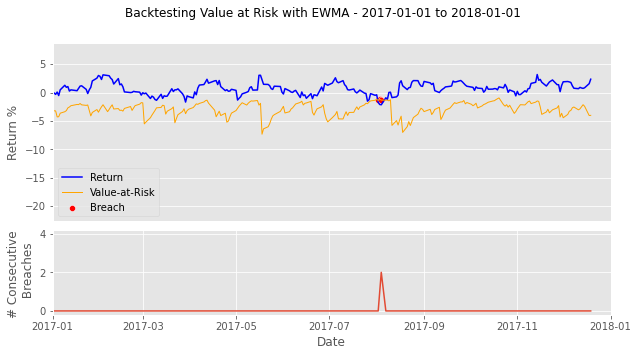

In [10]:
plot_backtest(var_ewma_df(), "Backtesting Value at Risk with EWMA", "Forward_Return", "VaR_99_10D_EWMA", "Breaches_EWMA", "Breaches_EWMA_Conc")